In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances


In [3]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

kmeans_score = silhouette_score(X_scaled, kmeans_labels)
print("K-Means Silhouette Score:", kmeans_score)


K-Means Silhouette Score: 0.45994823920518635


In [5]:
def kmedoids(X, k, max_iter=100):
    np.random.seed(42)

    # Step 1: random medoids
    medoid_indices = np.random.choice(len(X), k, replace=False)
    medoids = X[medoid_indices]

    for _ in range(max_iter):

        # Step 2: assign clusters (Manhattan distance)
        distances = pairwise_distances(X, medoids, metric='manhattan')
        labels = np.argmin(distances, axis=1)

        new_medoids = []

        # Step 3: update medoids
        for i in range(k):
            cluster_points = X[labels == i]

            if len(cluster_points) == 0:
                new_medoids.append(medoids[i])
                continue

            # compute total distance for each point
            dist_matrix = pairwise_distances(cluster_points, cluster_points, metric='manhattan')
            costs = dist_matrix.sum(axis=1)

            best_medoid = cluster_points[np.argmin(costs)]
            new_medoids.append(best_medoid)

        new_medoids = np.array(new_medoids)

        # stop if converged
        if np.all(medoids == new_medoids):
            break

        medoids = new_medoids

    # final assignment
    distances = pairwise_distances(X, medoids, metric='manhattan')
    labels = np.argmin(distances, axis=1)

    return labels, medoids


In [6]:
kmedoids_labels, medoids = kmedoids(X_scaled, 3)

kmedoids_score = silhouette_score(X_scaled, kmedoids_labels)
print("K-Medoids Silhouette Score:", kmedoids_score)


K-Medoids Silhouette Score: 0.44818868273794427


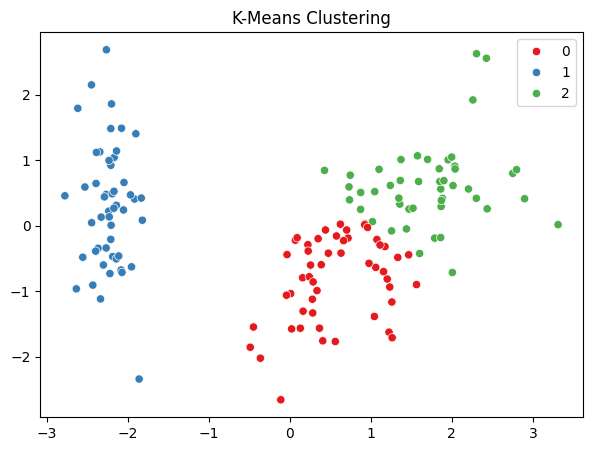

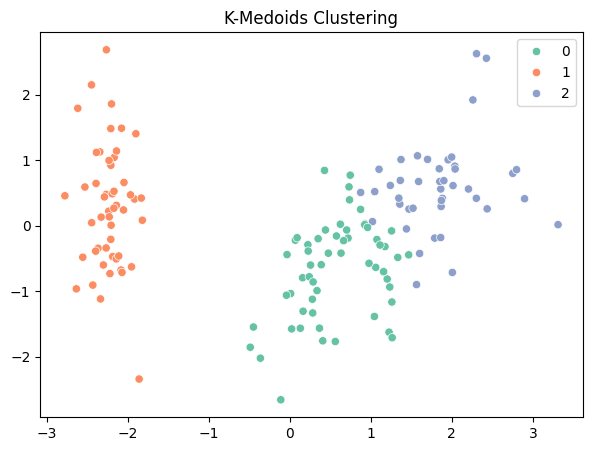

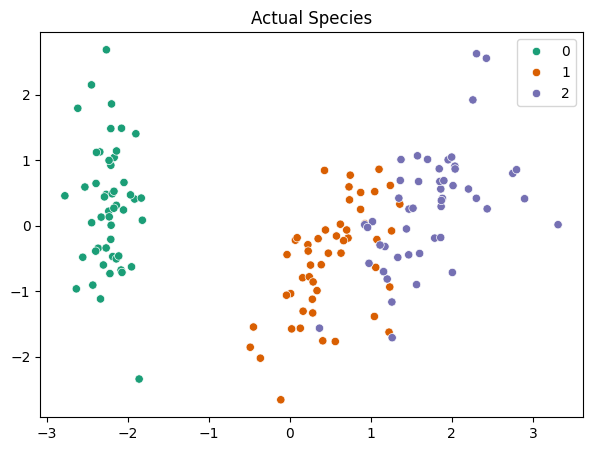

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans plot
plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_labels, palette='Set1')
plt.title("K-Means Clustering")
plt.show()

# KMedoids plot
plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmedoids_labels, palette='Set2')
plt.title("K-Medoids Clustering")
plt.show()

# Actual labels
plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='Dark2')
plt.title("Actual Species")
plt.show()


In [8]:
print("\nK-Means Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

print("\nK-Medoids Medoids:")
print(scaler.inverse_transform(medoids))



K-Means Centers:
[[5.80188679 2.67358491 4.36981132 1.41320755]
 [5.006      3.428      1.462      0.246     ]
 [6.78085106 3.09574468 5.5106383  1.97234043]]

K-Medoids Medoids:
[[5.7 2.8 4.5 1.3]
 [5.  3.4 1.5 0.2]
 [6.8 3.  5.5 2.1]]
